Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score

Getting the data

In [2]:
# read file into pandas using a relative path
data = pd.read_csv("spam.csv", encoding='latin-1')
data.dropna(how="any", inplace=True, axis=1)
data.columns = ['class', 'sms']

temp = data.copy() # Creating a temporary dataset 

In [3]:
data.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Analysis


In [4]:
# Checking for null values
data.isnull().sum()

class    0
sms      0
dtype: int64

In [5]:
# Getting the number of 'ham' and 'spam' emails 
data['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2288f17a400>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

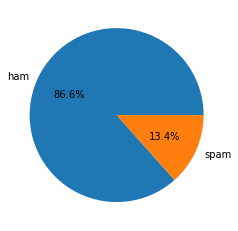

In [6]:
# Getting the distribution of the number of 'spams' and 'hams'
labels = data['class'].unique()
plt.pie(data['class'].value_counts(), labels=labels, autopct='%1.1f%%')

In [7]:
# LabelEncoding the 'class' column of the dataset
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [8]:
# Updated data 
data.head()

,class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Getting the integer value for 'ham' and 'spam'
print(data['class'][0])
print(temp['class'][0])
print('\n')
print(data['class'][2])
print(temp['class'][2])


0
ham


1
spam


Stemming, coverting a word to its root word

In [10]:
port_stem = PorterStemmer()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Defining a stemming function
def stemming(sms):
  sms = re.sub('[^a-zA-Z]',' ', sms)
  sms = sms.lower()
  sms = sms.split()
  sms = [port_stem.stem(word) for word in sms if not word in stopwords.words('english')]
  sms = ' '.join(sms)
  return sms

In [13]:
# Appling the stemming to the dataset
data['sms'] = data['sms'].apply(stemming)

In [14]:
data['sms']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: sms, Length: 5572, dtype: object

In [15]:
# Seperating the 'class' and 'sms' 
X = data['sms']
Y = data['class']

In [16]:
# Converting the Text inptut -> 'sms' into vector format 
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X) 

In [17]:
print(X)

  (0, 6060)	0.23615475543085504
  (0, 5886)	0.19459721085856557
  (0, 4046)	0.24054119706179242
  (0, 2898)	0.2850448490727193
  (0, 2794)	0.352275555327129
  (0, 2222)	0.19459721085856557
  (0, 2185)	0.16514812015268623
  (0, 2148)	0.14084052842905104
  (0, 1162)	0.2728131680559814
  (0, 957)	0.29760381268143565
  (0, 732)	0.29760381268143565
  (0, 730)	0.3362850956787249
  (0, 377)	0.2634906267537017
  (0, 188)	0.352275555327129
  (1, 5982)	0.4459451111953121
  (1, 3743)	0.5647537939557097
  (1, 3718)	0.2811632882742994
  (1, 2926)	0.4218684931830353
  (1, 2761)	0.47451057922863127
  (2, 6026)	0.2134950996997142
  (2, 5993)	0.16032634537022528
  (2, 5629)	0.13714969058149892
  (2, 5474)	0.24740093868924537
  (2, 5361)	0.13190077657140836
  (2, 5072)	0.220381850740506
  :	:
  (5567, 777)	0.15645173321182573
  (5567, 719)	0.29595768165908376
  (5568, 2431)	0.37453093229027423
  (5568, 2148)	0.29632963790124456
  (5568, 1979)	0.5740011643413078
  (5568, 1690)	0.6651601234243666
  (5569,

Splitting the data into training and testing data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 6221)
(1115, 6221)
(4457,)
(1115,)


Model

In [20]:
# Creating an XGBoost classifier object
xgb = xgb.XGBClassifier()

xgb.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb.predict(X_test)

In [21]:
# Evaluating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97847533632287
